In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

## we are going to solve 10 questions 5 each for basic , intermediate !

## -------------------------------------------------------------------------------------------------------------------------------

## BASIC

### Q1 list all the unique cities where customer are located 

In [8]:
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                            password = "Ananta20/08",
                            database = "ecomdb") 
cursor = db.cursor()

In [9]:
query = """ select distinct customer_city from customers """
cursor.execute(query)
data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### Q2 count the nos of orders placed in 2017

In [14]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """
cursor.execute(query)
data = cursor.fetchall()
"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 45101)

### Q3 find the total sales per category

In [22]:
# total sales that we have done is in the sales table 

# we here would need to use join as we need to find the total sales in per category and 
# since these two data are both in diff table 

# on the basis of product id we can put join on products category which is from products table and
# price+frieght value in order_items table we have to put join in this (price+frieght value = total sales price )

# or 

# we can use multiple joins like below that is explained below 

# Eplaination
#


query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category  
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data , columns= ["category" , "sales"])
df


,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### Q4 calculate the percentage of orders that were paid in installments

In [32]:
query = """ select sum((case when payment_installments >= 1 then 1 
else 0 end))/count(*)*100
from payments  """
cursor.execute(query)
data = cursor.fetchall()
data

[(Decimal('99.9981'),)]

### Q5 count no of customers from each state 

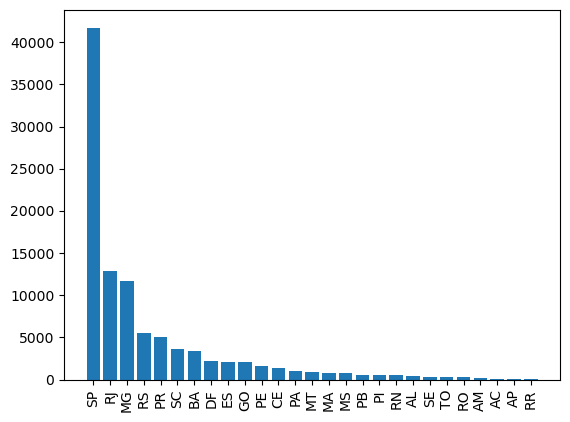

<Figure size 1100x200 with 0 Axes>

In [68]:
# using simple group by 

query = """ select customer_state , count(customer_id)
from customers group by customer_state"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data , columns = ["state" , "customer_count"])
df = df.sort_values(by ="customer_count" , ascending = False)
plt.bar(df["state"] , df["customer_count"])
plt.xticks(rotation = 90)
plt.figure(figsize=(11 , 2))
plt.show()

## ----------------------------------------------------------------------------------------------------------------------------

## INTERMEDIATE QUESTIONS

###  Q1 calculate the  number of orders per month in 2018

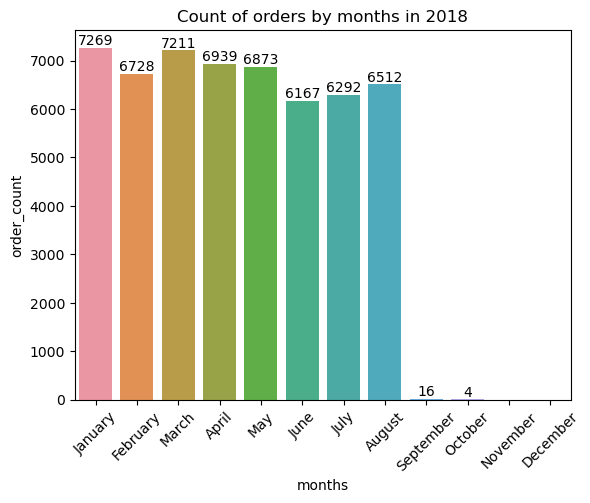

In [84]:
query = """ select monthname(order_purchase_timestamp) months , count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data , columns=["months" , "order_count"])
#creating the barplot
o = ["January","February","March","April","May","June","July","August","September","October","November","December"]

ax = sns.barplot(x = df["months"] , y = df["order_count"] , data = df , order = o)
plt.xticks(rotation = 45)   
ax.bar_label(ax.containers[0])#to show the values over the bar we use bar_label where container is the values from first ind
plt.title("Count of orders by months in 2018")
plt.show()

### Q2. Find the average number of products per order, grouped by customer city.

In [89]:
query = """ with count_per_order as 
(select orders.order_id,orders.customer_id , count(order_items.order_id) as OC
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city  , avg(count_per_order.oc) avg_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
"""
cursor.execute(query)
data = cursor.fetchall()
data

[('sao paulo', Decimal('1.1562')),
 ('sao jose dos campos', Decimal('1.1385')),
 ('porto alegre', Decimal('1.1749')),
 ('indaial', Decimal('1.1154')),
 ('treze tilias', Decimal('1.2727')),
 ('rio de janeiro', Decimal('1.1468')),
 ('mario campos', Decimal('1.3333')),
 ('guariba', Decimal('1.0000')),
 ('cuiaba', Decimal('1.1976')),
 ('franca', Decimal('1.2516')),
 ('tocos', Decimal('1.0000')),
 ('januaria', Decimal('1.1818')),
 ('campinas', Decimal('1.1575')),
 ('embu-guacu', Decimal('1.2391')),
 ('cerquilho', Decimal('1.1667')),
 ('belo horizonte', Decimal('1.1433')),
 ('taubate', Decimal('1.1348')),
 ('arcos', Decimal('1.1200')),
 ('monte mor', Decimal('1.0769')),
 ('vianopolis', Decimal('1.3333')),
 ('cacapava', Decimal('1.1622')),
 ('sao jose da tapera', Decimal('1.0000')),
 ('belford roxo', Decimal('1.0901')),
 ('pedro leopoldo', Decimal('1.2500')),
 ('arroio do sal', Decimal('1.2857')),
 ('sao bernardo do campo', Decimal('1.1422')),
 ('brasilia', Decimal('1.1304')),
 ('ribeirao pir